## Data Analysis of Laptop sales.

In [1]:
#import library and read the file.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
laptop = pd.read_csv('laptops.csv', encoding="latin-1")
laptop.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


## Data Cleaning 

In this part, we will clean the data where it is necessary. Cleaning of data involves Changing data type, remove or replace
unecssary sign and symbol. 

We will also deal with any NaN in Dataset. 

### Task 1: Replace space in column name with "_" and bring all of it to lowercase.

In [2]:
laptop.columns = laptop.columns.str.replace(r"[()]","").str.strip().str.lower()
laptop.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price euros'],
      dtype='object')

### Task2 : Get information about Dataset

In [3]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   manufacturer              1303 non-null   object
 1   model name                1303 non-null   object
 2   category                  1303 non-null   object
 3   screen size               1303 non-null   object
 4   screen                    1303 non-null   object
 5   cpu                       1303 non-null   object
 6   ram                       1303 non-null   object
 7   storage                   1303 non-null   object
 8   gpu                       1303 non-null   object
 9   operating system          1303 non-null   object
 10  operating system version  1133 non-null   object
 11  weight                    1303 non-null   object
 12  price euros               1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


In [31]:
laptop.shape

(1303, 15)

In [32]:
laptop.isnull().sum()

manufacturer                  0
model name                    0
category                      0
screen size                   0
screen                        0
cpu                           0
ram                           0
storage                       0
gpu                           0
operating system              0
operating system version    170
weight                        0
price euros                   0
disk size                     0
disk kind                     0
dtype: int64

### Task3: Remove and Change of Data type.

The following columns represent the numerical values: 
   * screen size
   * price euros
 
In this task, we will remove all non-numerical value and change it datatype to int/float. 

In [5]:
# screen size
laptop['screen size'] = laptop['screen size'].apply(lambda x : x.replace('"',"")).astype(float)

In [6]:
# price euros
laptop['price euros'] = laptop['price euros'].apply(lambda x : x.replace(",", ".")).astype(float)

### Task4: Split of Storage columns into disk size and disk kind

In [7]:
def Storage(disk):
    result = disk.split(" ")
    size = result[0]
    kind = result[1]
    
    return size, kind
laptop['disk size'] = laptop.storage.apply(lambda x : Storage(x)[0])
laptop['disk kind'] = laptop.storage.apply(lambda x : Storage(x)[1])
 

## Data Analysis

### Task1: Top laptop Manufacturer 

Text(0.5, 1.0, 'Sales of Laptop W.R.T Brand')

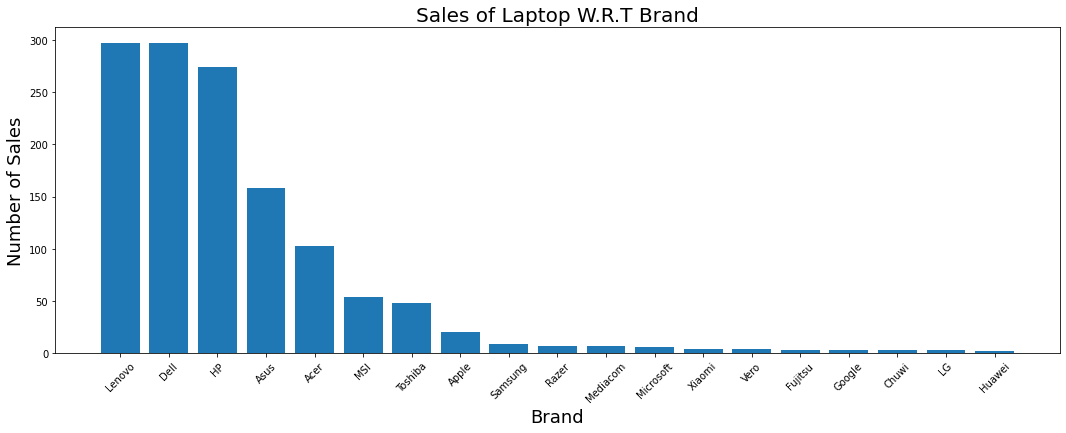

In [12]:
brand = laptop.manufacturer.value_counts()
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(brand.index, brand.values)
plt.xticks(rotation=45)
plt.xlabel('Brand', fontsize=18)
plt.ylabel('Number of Sales', fontsize=18)
plt.title('Sales of Laptop W.R.T Brand', fontsize=20)

Lenovo, Dell, HP, Asus, Acer are top 5 laptop Manufacturer

TypeError: list indices must be integers or slices, not tuple

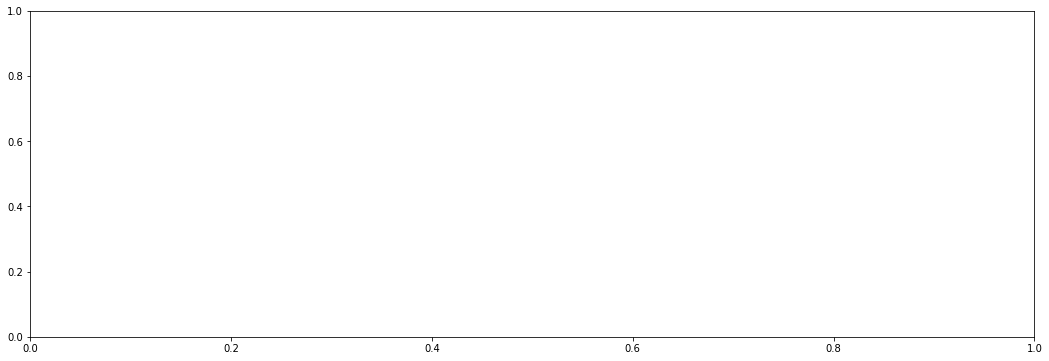

In [81]:
def model_count(argw):
    count = {}
    for i in argw:
        result = laptop[laptop['manufacturer'] == i]['model name'].unique()
        count[i] = len(result)
        
    return count

result = model_count(laptop.manufacturer)
        

result = sorted(result.items(), key = lambda x: x[1], reverse=True)
fig,ax = plt.subplots(figsize=(18,6))


In [47]:
laptop.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price euros', 'disk size',
       'disk kind'],
      dtype='object')

In [64]:
len(laptop[laptop['manufacturer'] == 'Lenovo']['model name'].unique())

138